In [1]:
#Importar librerías 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Analisis del dataset

In [3]:
# Crear data frame
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Limpieza de datos
Primero verificaremos los datos nulos y los duplicados

In [6]:
# Verificar filas duplicadas
print(df.duplicated().sum())

3


In [7]:
# Eliminamos las filas duplicadas
df = df.drop_duplicates()

In [8]:
# Verificar valores nulos
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Columnas no necesarias
Como solo tendremos en cuenta las columnas 'sepal length' y 'petal length' para las entradas, las demas no son necesarias, dejando solo esas y  la de 'species' paras las salidas

In [10]:
df = df.drop('sepal_width', axis = 1)
df = df.drop('petal_width', axis = 1)

In [11]:
df

,sepal_length,petal_length,species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
145,6.7,5.2,Iris-virginica
146,6.3,5.0,Iris-virginica
147,6.5,5.2,Iris-virginica
148,6.2,5.4,Iris-virginica


### Eliminaremos los valores de 'species'
Como se indica, solo analizaremos las tipos de flores 'versicilor' y 'setosa'

In [13]:
# Analisamos los valores que tenemos en 'species'
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
# Eliminar la 'Iris-virginica' que no tomaremos en cuenta para nuestro analisis
df = df[~(df['species'] == 'Iris-virginica')]

In [15]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

### Guardar el data set limpio

In [17]:
# Guardar los datos en un dataset nuevo
df.to_csv("IRIS_limpio.csv",  index=False)
df = pd.read_csv("IRIS_limpio.csv")
df

,sepal_length,petal_length,species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
93,5.7,4.2,Iris-versicolor
94,5.7,4.2,Iris-versicolor
95,6.2,4.3,Iris-versicolor
96,5.1,3.0,Iris-versicolor


### Definicion de entradas y salidas, así como la graficacion (scatter)

In [30]:
# Entradas
inputs = np.array(df[['sepal_length', 'petal_length']].values)
# Salidas
# Cambiamos los valores de 'Iris-setosa', 'Iris-versicolor' en la columna 'species' para facilitar el aprendizaje
labels = np.where(df['species'] == 'Iris-setosa', 1, 0)

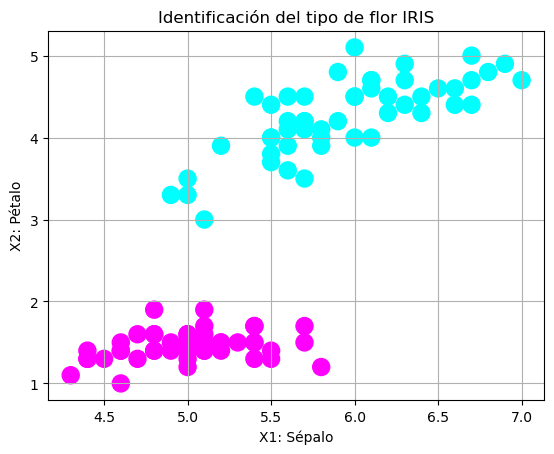

In [32]:
# Graficar los datos para observar si son linealmente separables
plt.scatter(inputs[:,0], inputs[:,1], c = labels, cmap='cool', marker = 'o', s = 150)
plt.title("Identificación del tipo de flor IRIS")
plt.xlabel("X1: Sépalo")
plt.ylabel("X2: Pétalo")
plt.grid(True)
plt.show()

In [34]:
# Definición de hiperparametros
learning_rate = 0.05
bias = np.random.rand() # 0.122
epochs = 10
weigths = [0.356, 0.259] # No es hiperparametro

In [36]:
# Clase Perceptron
class Perceptron():
    def __init__(self, inputs, labels, learning_rate, weigths, bias, epochs = 20):
        self.inputs = inputs
        self.labels = labels
        self.learning_rate = learning_rate
        self.weigths = weigths
        self.bias = bias
        self.epochs = epochs

    def activation(self, z):
        return 1 if z > 0 else 0

    def predict(self, input_x, weights_ajustados, bias_weights):
        # Calcular la funcion ponderada Z
        z = np.dot(input_x, weights_ajustados) + bias_weights
        # Calcular 'Y' predicha
        y_pred = self.activation(z)
        return y_pred

    def fit(self):
        # Abrir en un ciclo de acuerdo a las iteraciones (Epochs)
        for epoch in range(self.epochs):
            print(f"Epoch {epoch+1}/{self.epochs}", end = " ")

            # Variable para obtener el Errro por cada Epoch
            total_error = 0
            # Abrir ciclo para recorrer las entradas
            for input, label in zip(self.inputs, self.labels):
                # print(f"Input {input}, Label: {label}")
                # Calcular la función ponderada Z
                z = np.dot(input, self.weigths) + self.bias
                # Calcular y predicha
                y_pred = self.activation(z)
                # Calculamos el error
                error = label - y_pred
                total_error += abs(error)
                # Calcular el Delta W
                delta_w = self.learning_rate * error * input
                # Actualizar los weights
                self.weigths = self.weigths + delta_w
                # Actualizar el bias
                delta_bias = self.learning_rate * error
                self.bias = self.bias + delta_bias

            # Calcular el error promedio
            average_error = total_error/len(self.labels)
            print(f"Average Error: {average_error}")
        # Retornar los pesos y bias actualizados
        return self.weigths, self.bias

In [38]:
# Crear el objeto perceptron
perceptron = Perceptron(inputs, labels, learning_rate, weigths, bias, epochs)

# Entrada del perceptron
w,b = perceptron.fit()
print(f"Weigths fit: {w} Bias fit: {b}")

Epoch 1/10 Average Error: 0.02040816326530612
Epoch 2/10 Average Error: 0.030612244897959183
Epoch 3/10 Average Error: 0.01020408163265306
Epoch 4/10 Average Error: 0.0
Epoch 5/10 Average Error: 0.0
Epoch 6/10 Average Error: 0.0
Epoch 7/10 Average Error: 0.0
Epoch 8/10 Average Error: 0.0
Epoch 9/10 Average Error: 0.0
Epoch 10/10 Average Error: 0.0
Weigths fit: [ 0.091 -0.226] Bias fit: 0.088715665970312


In [54]:
# Función para hacer predicciones con nuevas entradas
print(f"[5.0,1.5]-->{perceptron.predict([5.0,1.5],w,b)}")
print(f"[6.1,4.7]-->{perceptron.predict([6.1,4.7],w,b)}")
print(f"[5.5,3.8]-->{perceptron.predict([5.5,3.8],w,b)}")
# Teniendo en cuenta que 1 --> 'Iris-setosa'
# Y que 0 --> 'Iris-versicolor'

[5.0,1.5]-->1
[6.1,4.7]-->0
[5.5,3.8]-->0
